In [241]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
#LEER EXCEL CON TODOS LOS DATOS
pd.set_option('display.max_columns', None)
drive.mount("/content/drive/", force_remount=True)
data = pd.read_csv('/content/drive/Shareddrives/EstacionMeteoroligica/Prediccion/BilbaoLoiu.csv', index_col="DATE")
data

# SON VALORES LEIDOS EN EL AEROPUERTO DE LOIU DESDE 1970-01-01 HASTA LA ACTUALIDAD
# PRCP - Precipitation
# TMAX - Maximum temperature
# TAVG - Average Temperature.
# TMIN - Minimum temperature

Mounted at /content/drive/


,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1970-01-01,SPE00120611,"BILBAO AEROPUERTO, SP",0.24,NaN,41.0,37.0
1970-01-02,SPE00120611,"BILBAO AEROPUERTO, SP",0.00,NaN,45.0,35.0
1970-01-03,SPE00120611,"BILBAO AEROPUERTO, SP",0.12,NaN,52.0,38.0
1970-01-04,SPE00120611,"BILBAO AEROPUERTO, SP",0.03,NaN,67.0,48.0
1970-01-05,SPE00120611,"BILBAO AEROPUERTO, SP",0.41,NaN,51.0,45.0
...,...,...,...,...,...,...
2022-11-07,SPE00120611,"BILBAO AEROPUERTO, SP",0.00,62.0,NaN,NaN
2022-11-08,SPE00120611,"BILBAO AEROPUERTO, SP",0.00,71.0,74.0,NaN
2022-11-09,SPE00120611,"BILBAO AEROPUERTO, SP",0.00,60.0,NaN,NaN


In [243]:
#Debemos limpiar nuestra muestra de datos.
#En primer lugar buscamos valores nulos

#data.shape --> (19308, 6) 

#data.apply(pd.isnull).sum()
# STATION       0
# NAME          0
# PRCP         75
# TAVG       1105
# TMAX         99
# TMIN         95
# dtype: int64

#Sacamos porcentaje de nulos por columna
data.apply(pd.isnull).sum()/data.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.003884
TAVG       0.057230
TMAX       0.005127
TMIN       0.004920
dtype: float64

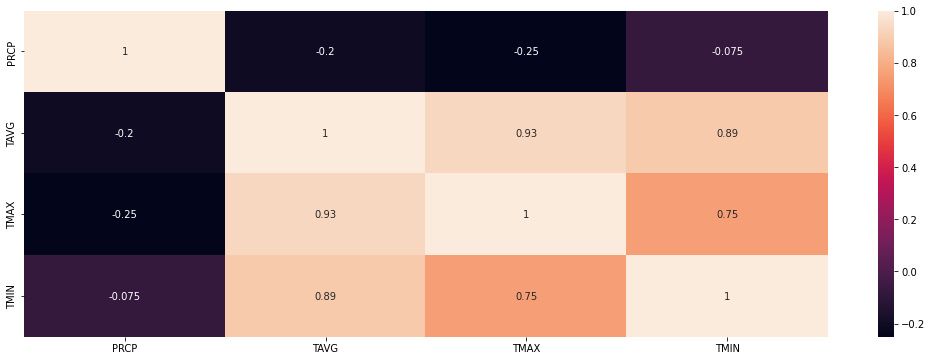

In [244]:
#Para saber como dirigir las reglas, hacemos una correlacion de los datos
correlacion_data = data.corr(method='pearson')
plt.figure(figsize=(18, 6))
sns.heatmap(correlacion_data, annot=True)
plt.show()

In [245]:
# TRAS LEER LA DOCUMENTACION DEL DATASET Y OBSERVAR EL GRAN PORCENTAJE DE ALGUNAS COLUMNAS, HACEMOS NUESTRA SELECCION.
core_data = data[["PRCP", "TAVG", "TMAX", "TMIN"]].copy()


In [246]:
#Buscamos valores nulos de nuevo
core_data.apply(pd.isnull).sum()

PRCP      75
TAVG    1105
TMAX      99
TMIN      95
dtype: int64

In [247]:
# Como tenemos muchos valores nulos, vamos a comprobar si podemos solucionarlo o no es rentable.
print("Valores TAVG")
core_data["TAVG"].value_counts()
#Esto significa que desde 1970 unicamente nevo 1 dia, y que ese dia nevo 1 pulgada. Por lo que tanto esta columna como la de snow_depth no aportan valor.


Valores TAVG


67.0    709
53.0    672
65.0    665
56.0    664
51.0    656
       ... 
91.0      2
30.0      1
90.0      1
95.0      1
89.0      1
Name: TAVG, Length: 64, dtype: int64

In [248]:
#Ahora examinaremos la columna de las precipitaciones, la siguiente columna con mas valores nulos
core_data[pd.isnull(core_data["TAVG"])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1970-01-01,0.24,NaN,41.0,37.0
1970-01-02,0.00,NaN,45.0,35.0
1970-01-03,0.12,NaN,52.0,38.0
1970-01-04,0.03,NaN,67.0,48.0
1970-01-05,0.41,NaN,51.0,45.0
...,...,...,...,...
1989-12-22,0.26,NaN,63.0,48.0
1999-01-10,0.65,NaN,47.0,36.0
2021-02-11,0.03,NaN,69.0,40.0


In [249]:
#Observando el dataset decidimos sustituir los valores nulos por valores medios calculados (Tmax + Tmin)/2, nos hemos encragado de los valores nulos de TAVG
core_data["TAVG"] = core_data["TAVG"].fillna((core_data["TMAX"]-core_data["TMIN"])/2)

In [250]:
core_data.apply(pd.isnull).sum()
#Hemos reducido el numero de nulos significantemente

PRCP    75
TAVG     0
TMAX    99
TMIN    95
dtype: int64

In [251]:
print("Valores TAVG")
core_data["PRCP"].value_counts()
#Vemos que la tendencia es que el valor sea 0 y como contamos con relativamnente pocos valores nulos los sustituiremos por 0s

Valores TAVG


0.00    10625
0.01      747
0.02      701
0.04      434
0.03      369
        ...  
2.52        1
2.70        1
1.44        1
3.33        1
2.36        1
Name: PRCP, Length: 233, dtype: int64

In [252]:
core_data["PRCP"] = core_data["PRCP"].fillna(0)

In [253]:
core_data.apply(pd.isnull).sum()
#Ahora nos hemos quitado los valores nulos de la columna de precipitaciones

PRCP     0
TAVG     0
TMAX    99
TMIN    95
dtype: int64

In [254]:
#Comprovamos valores nulos de las columnas restantes
core_data[pd.isnull(core_data["TMIN"])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2000-11-21,0.00,56.0,NaN,NaN
2000-11-22,0.00,56.0,NaN,NaN
2000-11-23,0.00,49.0,NaN,NaN
2000-11-24,0.00,47.0,NaN,NaN
2000-11-25,0.00,58.0,NaN,NaN
...,...,...,...,...
2022-11-04,0.16,56.0,61.0,NaN
2022-11-07,0.00,62.0,NaN,NaN
2022-11-08,0.00,71.0,74.0,NaN


In [255]:
core_data[pd.isnull(core_data["TMAX"])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2000-11-21,0.00,56.0,NaN,NaN
2000-11-22,0.00,56.0,NaN,NaN
2000-11-23,0.00,49.0,NaN,NaN
2000-11-24,0.00,47.0,NaN,NaN
2000-11-25,0.00,58.0,NaN,NaN
...,...,...,...,...
2022-11-05,0.29,54.0,NaN,45.0
2022-11-07,0.00,62.0,NaN,NaN
2022-11-09,0.00,60.0,NaN,NaN


In [256]:
#Rellenamos los valores nulos de ambas columnas utilizando el metodo fillna, que asigna valores anteriores a los valores nulos.
#EJ. El dia 2004-11-20 es un valor nulo, por lo que buscara si el dia 19 es nulo, y en caso de que no lo sea, asignara el valor del dia 19 al dia 20,
# en caso de que el dia anterior sea nulo, seguira subiendo hasta encontrar un valor que no lo sea
core_data = core_data.fillna(method="ffill")

In [257]:
#Comprobamos de nuevo los valores nulos.
core_data.apply(pd.isnull).sum()
#Hemos eliminado valores nulos que puedan confundir a la IA

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [258]:
#Ahora comprovaremos los tipos de datos que tenemos
core_data.dtypes

PRCP    float64
TAVG    float64
TMAX    float64
TMIN    float64
dtype: object

In [259]:
core_data.index
#Vemos que nuestro indice con fechas, son en realidad Objetos, lo que no es ideal

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
       '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11'],
      dtype='object', name='DATE', length=19308)

In [260]:
#Transfomamos los objetos en tipo de datos datetime
core_data.index = pd.to_datetime(core_data.index)
#Esto nos permite filtrar por año, mes y dia, entre otras cosas.

In [261]:
#En la documentacion de dataset aparece que los valores = 9999 significan fallo en el dato, por lo que miramos si tenemos este tipo de valores
core_data.apply(lambda x: (x == 9999).sum())

#---------------------------------------FINAL DE MODIFICACION DE DATOS-----------------------------------------------------------------

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

**ANALISIS DEL DATASET MODIFICADO**

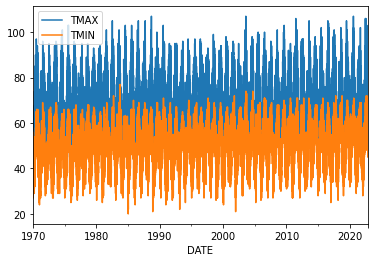

In [262]:
core_data[["TMAX", "TMIN"]].plot()
#Se aprecia como hay una perdida de datos en algunos ragos de años.

In [263]:
core_data.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    315
Name: DATE, dtype: int64

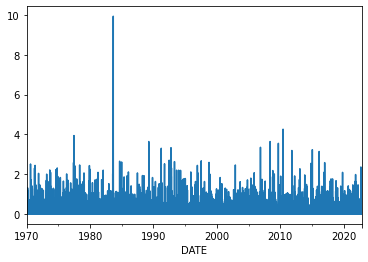

In [264]:
core_data["PRCP"].plot()
#Vemos algunos valores que sobresalen

In [265]:
core_data.sort_values(by=["PRCP"], ascending=False)

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1983-08-26,9.94,65.0,68.0,63.0
2010-06-16,4.26,56.0,60.0,54.0
1977-06-12,3.94,60.0,66.0,55.0
1989-04-03,3.64,49.0,57.0,38.0
2008-05-31,3.64,62.0,66.0,59.0
...,...,...,...,...
1996-07-11,0.00,66.0,73.0,59.0
1996-07-12,0.00,68.0,76.0,58.0
1996-07-13,0.00,70.0,78.0,63.0


In [266]:
core_data = core_data.drop("1983-08-26")
#eLIMINAMOS EL VALOR QUE SALIA DE LO NORMAL, DE HECHO FUE EL DIA DE LAS INUNDACIONES

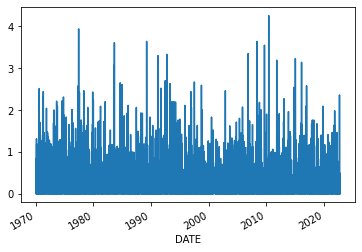

In [267]:
core_data["PRCP"].plot()

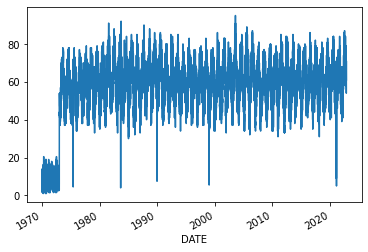

In [268]:
core_data["TAVG"].plot()
#Gran variedad de valroes malos

In [269]:
core_data.sort_values(by=["TAVG"], ascending = True)

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1970-08-05,0.22,1.0,66.0,64.0
1970-10-01,0.48,1.0,66.0,64.0
1970-03-19,0.18,1.0,55.0,53.0
1971-06-05,0.78,1.5,60.0,57.0
1971-03-26,0.44,1.5,53.0,50.0
...,...,...,...,...
2003-08-08,0.00,91.0,103.0,71.0
1981-07-29,0.00,91.0,101.0,62.0
1983-09-23,0.00,92.0,94.0,77.0


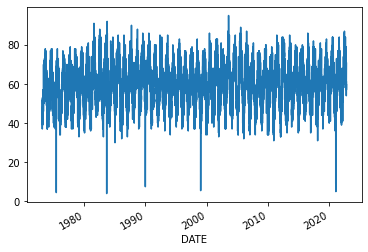

In [270]:
core_data = core_data.loc["1973-01-30":]
core_data["TAVG"].plot()
#Ahora tiene algo mas de sentido

In [271]:
core_data.sort_values(by=["TAVG"], ascending = True)


,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1983-08-28,0.04,4.0,72.0,64.0
1975-05-31,0.66,4.5,63.0,54.0
2021-02-20,0.00,5.0,72.0,62.0
1999-01-10,0.65,5.5,47.0,36.0
1983-08-29,0.00,6.0,76.0,64.0
...,...,...,...,...
1981-07-29,0.00,91.0,101.0,62.0
2003-08-08,0.00,91.0,103.0,71.0
1983-09-23,0.00,92.0,94.0,77.0


**PREDICCION**

In [272]:
#Vamos a empezar intentando predecir la temperatura maxima del dia siguiente, para esto vamos a crear una nueva columna que coje como valor la temperatura del dia siguiente
# algo asi como el resultado que queremos obtener
core_data["target"] = core_data.shift(-1)["TMAX"]
#Quitamos la ultima fila porque no sabemos el valor que hara mañana
core_data = core_data.iloc[:-1,:].copy()

In [273]:
core_data

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
1973-01-30,0.67,45.0,54.0,39.0,51.0
1973-01-31,1.69,48.0,51.0,44.0,50.0
1973-02-01,0.20,45.0,50.0,36.0,49.0
1973-02-02,0.00,41.0,49.0,34.0,49.0
1973-02-03,0.00,41.0,49.0,33.0,65.0
...,...,...,...,...,...
2022-11-06,0.00,57.0,72.0,45.0,72.0
2022-11-07,0.00,62.0,72.0,45.0,74.0
2022-11-08,0.00,71.0,74.0,45.0,74.0


In [274]:
core_data.to_csv(r'/content/drive/Shareddrives/EstacionMeteoroligica/Prediccion/DatosLimpios.csv', index=False)

In [275]:
from sklearn.linear_model import Ridge
#Regresion lineal que minimiza el overfitting (Ajustarnos demasiado y que falle)
reg = Ridge(alpha=.1) #alpha es cuanto cambia x en referente a y por asi decirlo

In [276]:
#Variables que usaremos para predecir la temperatura maxima del dia siguiente
predictors = ["PRCP", "TMAX", "TMIN","TAVG"]

In [277]:
#Ahora dividimos el dataset en  2 la muestra de entrenamiento y la de testeo
train = core_data.loc[:"2020-12-31"]
test = core_data.loc["2021-01-01":]
#Queremos usar datos del pasado para predecir el futuro, al reves no tendira sentido y empeoraria la calidad del resultado

In [278]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Funcion que:
# 1- Divide el dataset
# 2- Lo entrena
# 3- Saca el error
# 4- Compara resultados
def create_predictions(predictors, core_data, reg):
    train = core_data.loc[:"2020-12-31"]
    test = core_data.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)
    #error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [279]:
error, combined = create_predictions(predictors, core_data, reg)
combined
#Valores reales VS Valores predecidos

,actual,predictions
DATE,,
2021-01-01,47.0,48.778196
2021-01-02,44.0,50.003904
2021-01-03,42.0,45.569913
2021-01-04,43.0,43.102551
2021-01-05,48.0,48.738573
...,...,...
2022-11-06,72.0,68.664899
2022-11-07,74.0,70.273601
2022-11-08,74.0,74.095532


In [280]:
error
#Error de 4.57 grados F

4.582177624210992

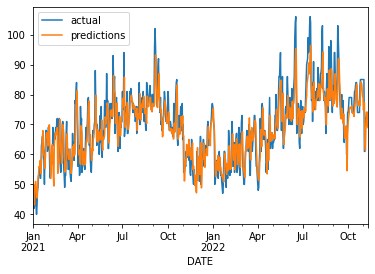

In [281]:
combined.plot()

In [282]:
reg.coef_ #Que / Como afectan nuestras variables en la temperatura maxima (Ej. Las precipitaciones afectan negativamente, cosa que tiene sentido)

array([-4.39530667,  0.46313394,  0.10421655,  0.32174038])

In [283]:
#Como observamos que TAVG no tiene un coeficiente significante porbamos a ver el resultado sin el
predictors = ["PRCP", "TMAX", "TMIN"]
error, combined = create_predictions(predictors, core_data, reg)
error
#Mejoramos el error


4.579308177600628

In [284]:
#Vamos a crear mas variables que utilizar para la prediccion, para esto creamos las siguientes columnas
core_data["month_max"] = core_data["TMAX"].rolling(30).mean() #rolling coje los 30 valores previos y calcula su media

core_data["month_day_max"] = core_data["month_max"] / core_data["TMAX"] #DIferencia entre la media de temperatura maxima del mes y el dia

core_data["max_min"] = core_data["TMAX"] / core_data["TMIN"] #Diferencia entre temperaturas maximas y medias

#Basicamente estamos intentando crear columnas que tengan relacion con la temperatura maxima del proximo dia para que la IA se percate de esto y reducir el error qu tenemos

In [285]:
#Nuevas columnas para prediccion
predictors = ["PRCP", "TMAX", "TMIN","month_max","month_day_max","max_min"]

In [286]:
core_data = core_data.iloc[30:,:].copy() #La columna de month_max y month_day_max tienen valores nulos los 30 primeros dias, por lo que los borramos para que no de error


In [287]:
error, combined = create_predictions(predictors, core_data, reg)
error

4.583768006007082

In [288]:
reg.coef_

array([ -4.66875473,   0.12540361,   0.21689216,   0.63466808,
       -23.98229797,   3.36996027])

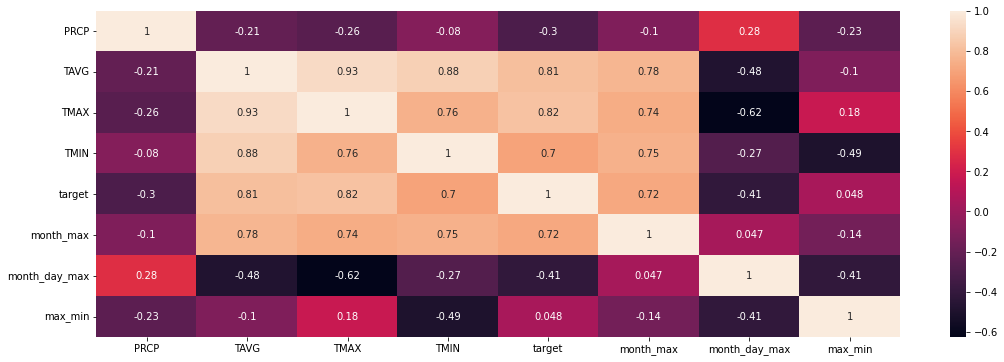

In [289]:
correlacion_data = core_data.corr(method='pearson')
plt.figure(figsize=(18, 6))
sns.heatmap(correlacion_data, annot=True)
plt.show()

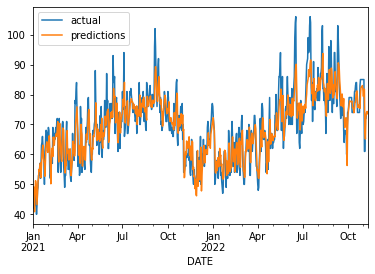

In [290]:
combined.plot()

In [291]:
#Nuevas columnas
#Calculamos la temperatura de forma ascendente , de modo que unicamente usamos datos anteriores con los nuevos
core_data["monthly_avg"] = core_data["TMAX"].groupby(core_data.index.month).apply(lambda x: x.expanding(1).mean())
core_data["day_of_year_avg"] = core_data["TMAX"].groupby(core_data.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [292]:
predictors = ["PRCP", "TMAX", "TMIN","month_max", "month_day_max", "max_min","monthly_avg", "day_of_year_avg"]
error, combined = create_predictions(predictors, core_data, reg)
error
#Baja el error de nuevo

4.605393472627412

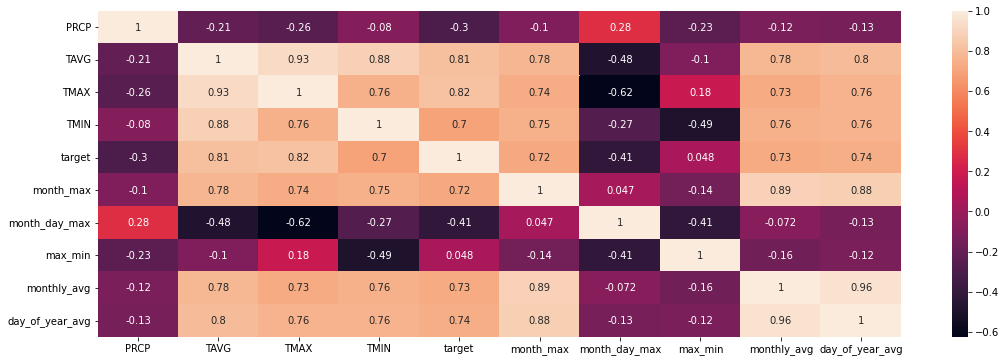

In [293]:
correlacion_data = core_data.corr(method='pearson')
plt.figure(figsize=(18, 6))
sns.heatmap(correlacion_data, annot=True)
plt.show()

#Observamos que max_min no tiene mucha relacion

In [294]:
#Lo mismo qeu la matriz pero mas legible
core_data.corr()["target"]
#Al ver que los valores son relativamente altos, vemos que efectivamente son datos de valor para la prediccion

PRCP              -0.300883
TAVG               0.814449
TMAX               0.823107
TMIN               0.697005
target             1.000000
month_max          0.715247
month_day_max     -0.409856
max_min            0.048497
monthly_avg        0.727558
day_of_year_avg    0.742841
Name: target, dtype: float64

In [295]:
combined


,actual,predictions
DATE,,
2021-01-01,47.0,47.993710
2021-01-02,44.0,49.376244
2021-01-03,42.0,44.321516
2021-01-04,43.0,41.328948
2021-01-05,48.0,47.364229
...,...,...
2022-11-06,72.0,70.183490
2022-11-07,74.0,70.238770
2022-11-08,74.0,71.220739


In [296]:
#Volvemos a calcular el error sin max_min y vemos que empeora.
# predictors = ["PRCP", "TMAX", "TMIN","month_max", "month_day_max","monthly_avg", "day_of_year_avg"]
# error, combined = create_predictions(predictors, core_data, reg)
# error
# Error 3.352553821316938 ha empeorado por lo que descartamos los cambios

In [297]:
#Creamos la columna de diferencia entre valor predicho y real
combined["Diferencia"] = combined["actual"] - combined["predictions"]

In [298]:
combined.sort_values(by=["Diferencia"])
#Ordenamos la tabla para ver cuales son los errores mas grandes

,actual,predictions,Diferencia
DATE,,,
2021-07-05,66.0,84.790745,-18.790745
2022-11-03,61.0,77.850873,-16.850873
2021-06-02,62.0,76.105977,-14.105977
2021-10-20,66.0,79.174138,-13.174138
2022-06-19,67.0,79.844700,-12.844700
...,...,...,...
2022-06-17,106.0,88.565184,17.434816
2022-06-15,99.0,81.317850,17.682150
2021-09-04,96.0,78.173085,17.826915


In [299]:
#Miramos que ocurre
core_data.loc["2021-03-28":"2021-04-10"] 

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2021-03-28,0.00,59.0,78.0,39.0,77.0,59.666667,0.764957,2.000000,61.278364,61.510204
2021-03-29,0.00,69.0,77.0,60.0,81.0,60.433333,0.784848,1.283333,61.288728,62.102041
2021-03-30,0.00,71.0,81.0,62.0,84.0,61.266667,0.756379,1.306452,61.301713,62.346939
2021-03-31,0.00,73.0,84.0,63.0,74.0,62.000000,0.738095,1.333333,61.316656,63.795918
2021-04-01,0.00,68.0,74.0,54.0,67.0,62.133333,0.839640,1.370370,63.470507,64.265306
2021-04-02,0.00,58.0,67.0,51.0,56.0,62.000000,0.925373,1.313725,63.472954,62.775510
2021-04-03,0.00,54.0,56.0,49.0,58.0,61.533333,1.098810,1.142857,63.467775,60.816327
2021-04-04,0.00,51.0,58.0,41.0,63.0,61.600000,1.062069,1.414634,63.463989,60.469388
2021-04-05,0.00,50.0,63.0,37.0,53.0,61.933333,0.983069,1.702703,63.463668,61.673469


In [300]:
core_data.loc["2021-10-10":"2021-10-20"]
#Podemos apreciar que ambos dias en los que el error es mayor, son dias en los que la temperatura ha cambaido drasticamente el dia siguiente. 

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2021-10-10,0.0,61.0,67.0,52.0,69.0,74.666667,1.114428,1.288462,70.293725,71.142857
2021-10-11,0.0,57.0,69.0,47.0,66.0,74.200000,1.075362,1.468085,70.292862,72.346939
2021-10-12,0.0,54.0,66.0,47.0,66.0,73.433333,1.112626,1.404255,70.290000,71.387755
2021-10-13,0.0,55.0,66.0,45.0,77.0,72.566667,1.099495,1.466667,70.287142,70.897959
2021-10-14,0.0,56.0,77.0,43.0,68.0,72.466667,0.941126,1.790698,70.291611,70.938776
2021-10-15,0.0,58.0,68.0,48.0,70.0,72.100000,1.060294,1.416667,70.290086,70.163265
2021-10-16,0.0,61.0,70.0,51.0,73.0,71.966667,1.028095,1.372549,70.289894,70.897959
2021-10-17,0.0,65.0,73.0,57.0,80.0,71.766667,0.983105,1.280702,70.291694,69.469388
2021-10-18,0.0,67.0,80.0,54.0,84.0,72.100000,0.901250,1.481481,70.298141,68.551020
